In [150]:
#=========================
#MIGUEL DOMINGUEZ
# CSC 59929
# Machine Learning
# Prof. Erik K. Grimmelmann
# Date: 09/29/17
# Homework Week 5
#=========================

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [153]:
#Obtain Iris Dataset and save it to a Pandas Frame
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#Rename columns
new_columns = ['Sepal Length [0]', 'Sepal Width [1]', 'Petal Length [2]', 'Petal Width [3]','Class']
iris.columns = new_columns
iris.head()

,Sepal Length [0],Sepal Width [1],Petal Length [2],Petal Width [3],Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [154]:
#We use all 3 flower clases (SVV means Setosa & Versicolor & Virginica)
SVV = iris.iloc[:,:].values

#Standardize the features
for i in range(0,4):
    SVV[:,i] = (SVV[:,i] - SVV[:,i].mean()) / SVV[:,i].std()      

#Get class vector
Y = SVV[:,4]
for i in range(0,len(Y)):
    if Y[i] == 'Iris-setosa':
        Y[i] = 0
    elif Y[i] == 'Iris-versicolor':
         Y[i] = 1
    else:
         Y[i] = 2
#Convert Y to list
Y = Y.tolist()

In [155]:
#IMPORTANT:

#    To train our models we will use the first
#    35 samples for each class. That means 
#    the training set will consist of 105 samples

#    To test the model we use the last 15 samples for each class.
#    That means a test set of 45 samples

In [156]:
#Training and testing data for class
Y_train = np.concatenate((Y[0:35],Y[50:85]))
Y_train = np.concatenate((Y_train, Y[100:135]))
Y_test = np.concatenate((Y[35:50],Y[85:100]))
Y_test = np.concatenate((Y_test,Y[135:150]))

In [157]:
#TRAINING DATA & TESTING DATA 

#We obtain the matrices with two features, total of 6 pairs

#Helping lists to obtain unique pairs
num = ['SepLen0','SepWid1','PetLen2','PenWidth3']
res = []

pairs_train = [] #Save unique pairs of features for training
pairs_test  = [] #"  " testing

for i in range(0,len(num)-1):
    for j in range(0,len(num)):
        tup = (num[i],num[j]) 
        inv = (num[j],num[i])
        value = (tup in  res) or (inv in res) or (i == j) #Check existence of pair
        if not value:
            res.append((num[i],num[j])) #Add pair to helper list
            
            joint_train = np.concatenate((SVV[0:35,(i,j)], SVV[50:85,(i,j)]))
            joint_train = np.concatenate((joint_train, SVV[100:135,(i,j)]))
            
            joint_test = np.concatenate((SVV[35:50,(i,j)], SVV[85:100,(i,j)]))
            joint_test = np.concatenate((joint_test, SVV[135:150,(i,j)]))
            
            pairs_train.append(joint_train)  #Add new pair of features
            pairs_test.append(joint_test)
            
#In this way list "pairs" contains all unique matrices with 2 features

#Matrices with three features, total of 4 triplets 
triplets_train = [SVV[:,(0,1,2)], SVV[:,(0,1,3)], SVV[:,(0,2,3)], SVV[:,(1,2,3)]]
triplets_test = []
for i in range(0,len(triplets_train)):
    joint_test = np.concatenate((triplets_train[i][35:50],triplets_train[i][85:100]))
    joint_test = np.concatenate((joint_test,triplets_train[i][135:150]))
    
    triplets_test.append(joint_test) #New test data for triplet

    
    joint_train = np.concatenate((triplets_train[i][0:35],triplets_train[i][50:85]))
    triplets_train[i] = np.concatenate((joint_train,triplets_train[i][100:135])) #New training data for triplet
    
#Matrix with four features, total of 1 quad
quad_train = []
quad_test = []

joint_test = np.concatenate((SVV[35:50,(0,1,2,3)],SVV[85:100,(0,1,2,3)]))
joint_test = np.concatenate((joint_test,SVV[135:150,(0,1,2,3)]))

quad_test.append(joint_test) #Test data for 4 features

joint_train = np.concatenate((SVV[0:35,(0,1,2,3)],SVV[50:85,(0,1,2,3)]))
joint_train = np.concatenate((joint_train,SVV[100:135,(0,1,2,3)]))

quad_train.append(joint_train) #Training data for 4 features

In [158]:
#At this point, lists: pairs_train, triplets_train and quad_train containt the 11 sets of traning data
# lists: pairs_test, triplets_test and quad_test containt the 11 sets of test data

In [159]:
#Labels used to display the graphs for 2 features. 
graph_lab = [['Sepal Length [standardized]','Sepal Width [standardized]'],
             ['Sepal Length [standardized]','Petal Length [standardized]'],
             ['Sepal Length [standardized]','Pepal Width [standardized]'],
             ['Sepal Width [standardized]','Pepal Length [standardized]'],
             ['Sepal Width [standardized]','Pepal Width [standardized]'],
             ['Pepal Length [standardized]','Pepal Width [standardized]']]

In [152]:
#Function provided by the book in order to graph the sets containing two features. 
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
     # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')
    #plt.show()

In [163]:
#Training function and accuracy yield.
"This function gets the training and test data to train the model and compare"
"against the test data."
"Inputs: training sets and testing sets, an input to provide graphs for pair features"
"max_iter let us pick the iterations for the model and C is used for regularization"
"Output: a list containing the accuracy for each model provided"
def train_and_get_accuracy(train_sets,test_sets,class_train,class_test,graph=False,max_iter=100, C = 1000.0):
    accuracy_list = []

    for i in range(0,len(train_sets)): #Loop to train each model
        model = LogisticRegression(C=C, random_state=0,max_iter=max_iter) #max_iter = 7
        model.fit(train_sets[i],class_train) #model trained
        
        if graph: #If the model has 2 features we proceed to graph and see the convergance
            plot_decision_regions(test_sets[i], class_test, classifier=model, test_idx=range(0,45))
            plt.xlabel(graph_lab[i][0]) #Put labels
            plt.ylabel(graph_lab[i][1])
            plt.legend(loc='upper left')
            plt.show()
    
        #Predict test data class values
        Y_prediction = model.predict(test_sets[i])
        #Obtain misclassifications made by the model
        misclassfied = (class_test != Y_prediction).sum()
        #Missclassification error and accuracy
        error = misclassfied/len(class_test)
        accuracy = 1 - error        
        accuracy_list.append(np.around(accuracy,decimals=4)) #Save accuracy value for model
    return accuracy_list

In [164]:
#Bar chart function
"Given the accuracy for the 11 models, we use that data to make a bar graph"
"Inputs: 3 lists containing the accuracy for the feature models respectively"
"optext: takes input text to be displayed in title"
"Output: bar chart displaying accuracy for each model."
def barchart(accuracy2f,accuracy3f,accuracy4f,optext=''):
    #=====PLOT Preparations and Plotting====#
    width = 0.75
    ind = np.arange(11)
    fig, ax = plt.subplots(figsize=(20,7))
    two_bars = ax.bar([0,1,2,3,4,5], accuracy2f , width, color='#6FE7DD')
    three_bars = ax.bar([6,7,8,9], accuracy3f , width, color='#3490DE')
    four_bars = ax.bar(10, accuracy4f , width, color='#6639A6')
    fiv = ax.bar(5,0,0,color='white')

    #Add some text for labels, title and axes ticks
    ax.set_xlabel("Features",fontsize=20)
    ax.set_ylabel('Accuracy',fontsize=20)
    ax.set_title('Feature Models and their Accuracy' + optext,fontsize=35)
    ax.set_xticks(ind) #Positioning on the x axis
    ax.set_xticklabels(('01', '02','03','12','13','23','012','013','023','123','0123'),
                      fontsize = 20)
    ax.legend((two_bars,three_bars,four_bars,fiv),('2 features','3 features','4 features','0 = Sepal Length | 1 = Sepal Width | 2 = Petal Length | 3 = Petal Width'),
              fontsize=17,loc= 'upper center')

    def autolabel(rects,fontsize=20):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1*height,height,
                    ha='center', va='bottom',fontsize=fontsize)
    autolabel(two_bars)
    autolabel(three_bars)
    autolabel(four_bars)
    plt.ylim([0,2])
    plt.show()

In [ ]:
#WE ARE READY TO USE OUR TRAINING FUCTION, OBTAIN THE ACCURACY, PLOT AND GRAPH THE BAR CHARTS

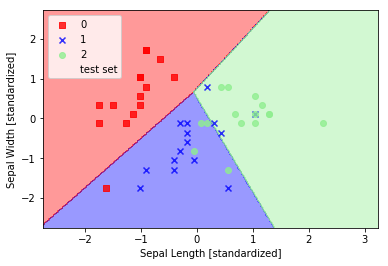

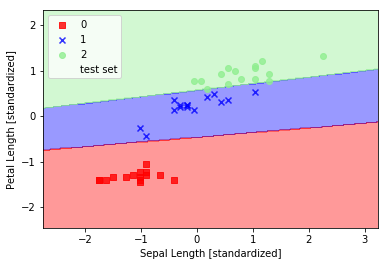

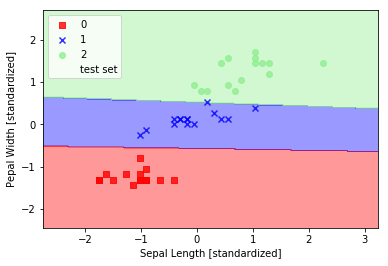

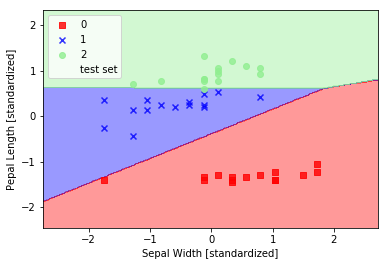

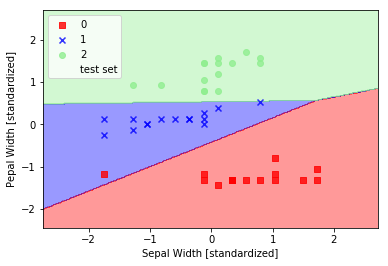

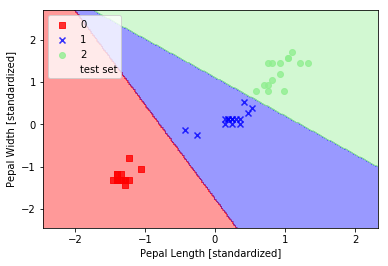

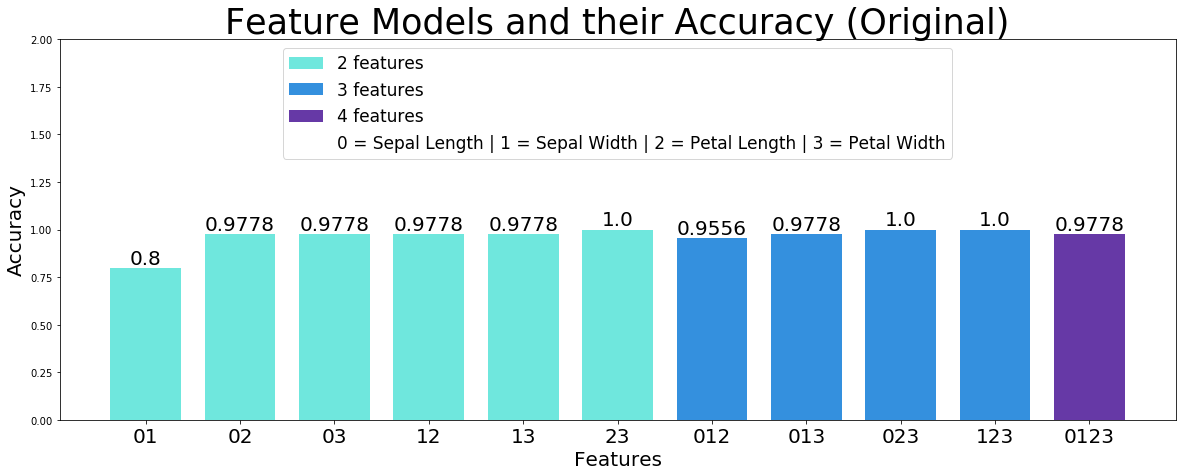

In [165]:
#We train all models here for a standard logistic regression. 
accuracy2f = train_and_get_accuracy(pairs_train,pairs_test,Y_train,Y_test,graph=True)
accuracy3f = train_and_get_accuracy(triplets_train,triplets_test,Y_train,Y_test)
accuracy4f = train_and_get_accuracy(quad_train,quad_test,Y_train,Y_test)

barchart(accuracy2f,accuracy3f,accuracy4f, optext=" (Original)")

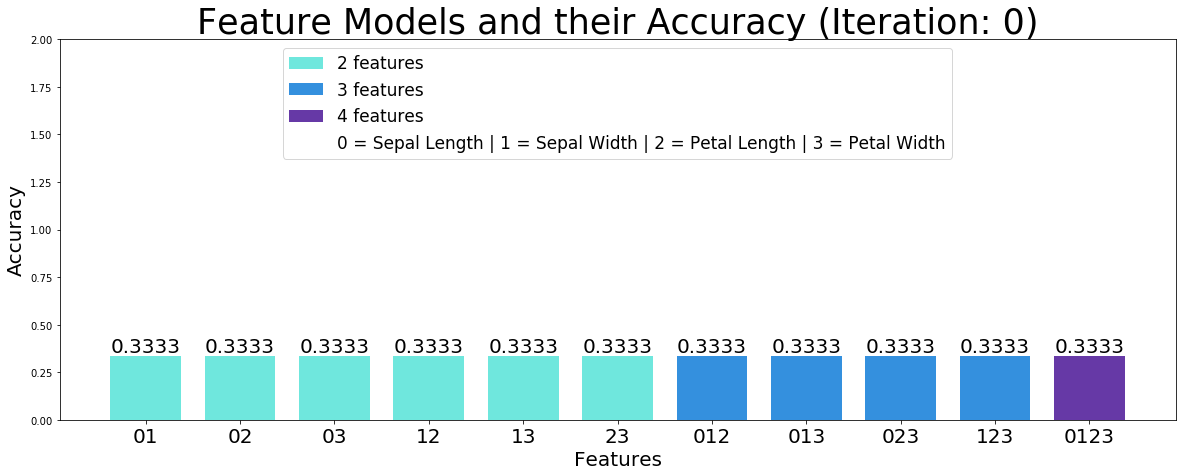

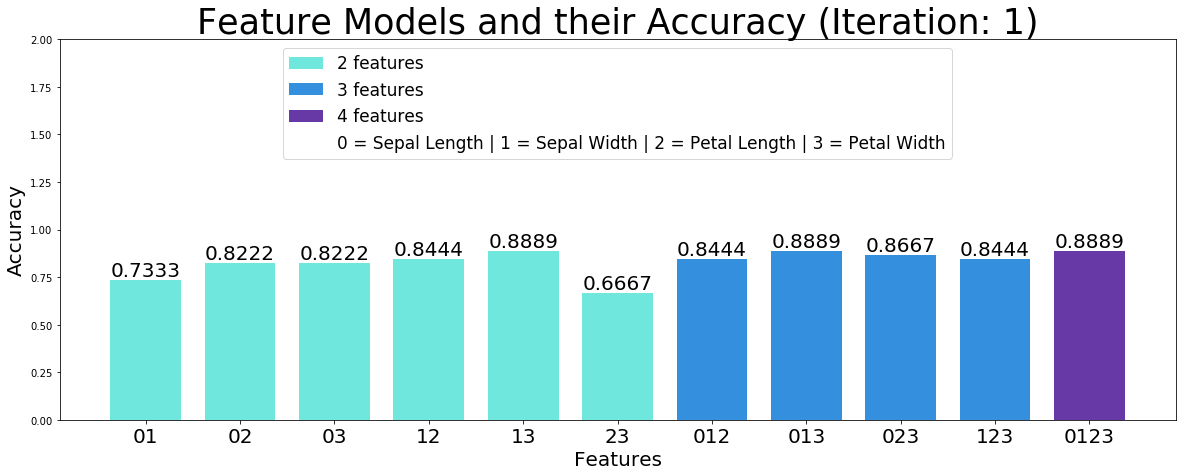

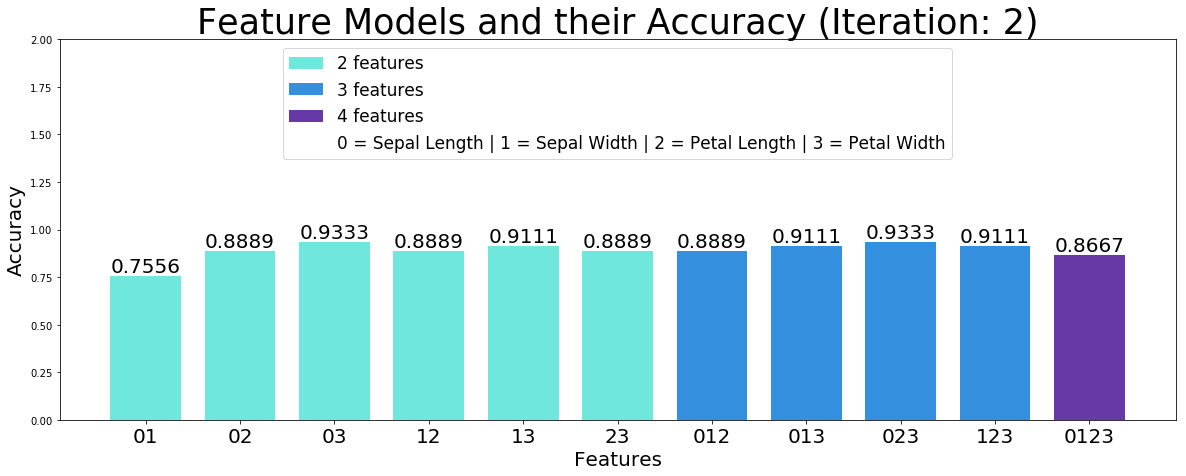

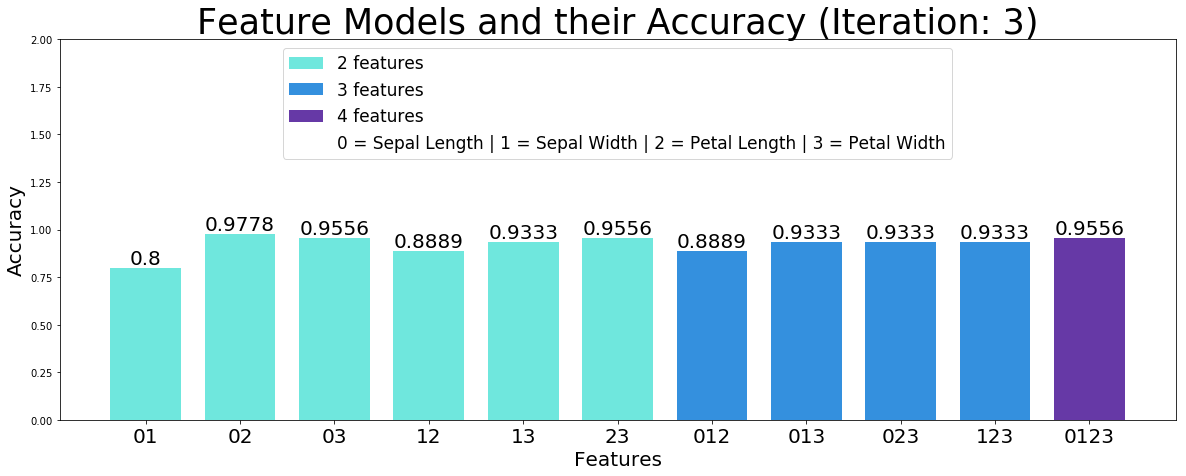

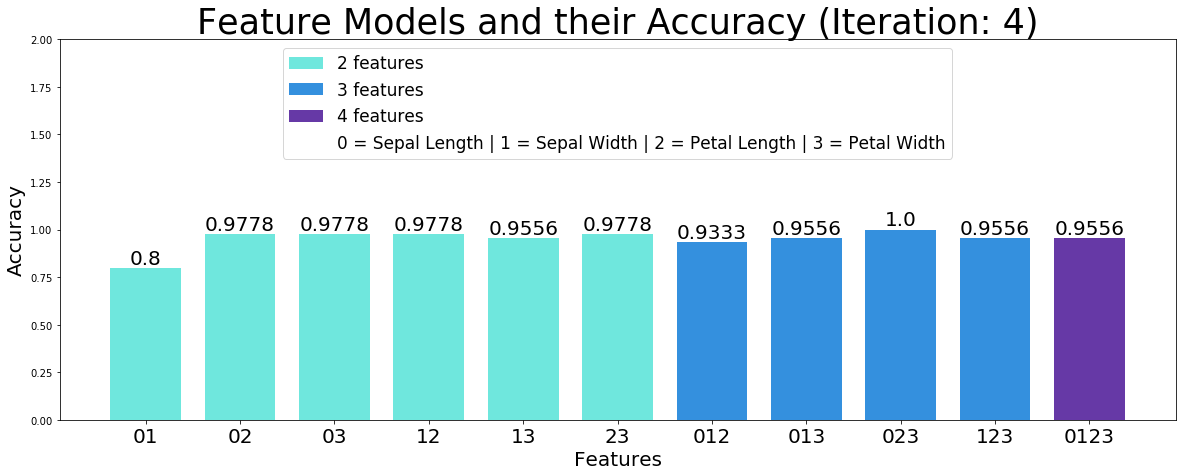

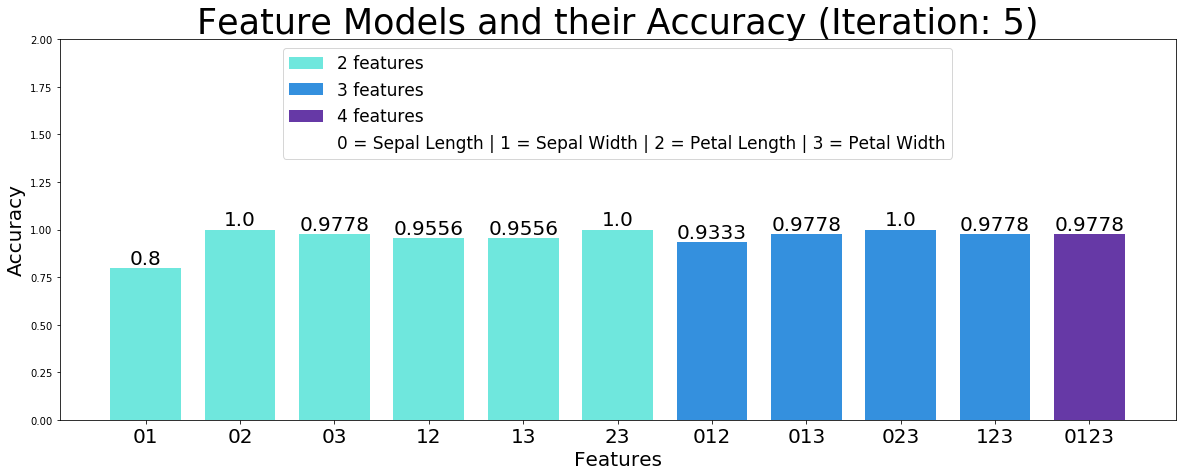

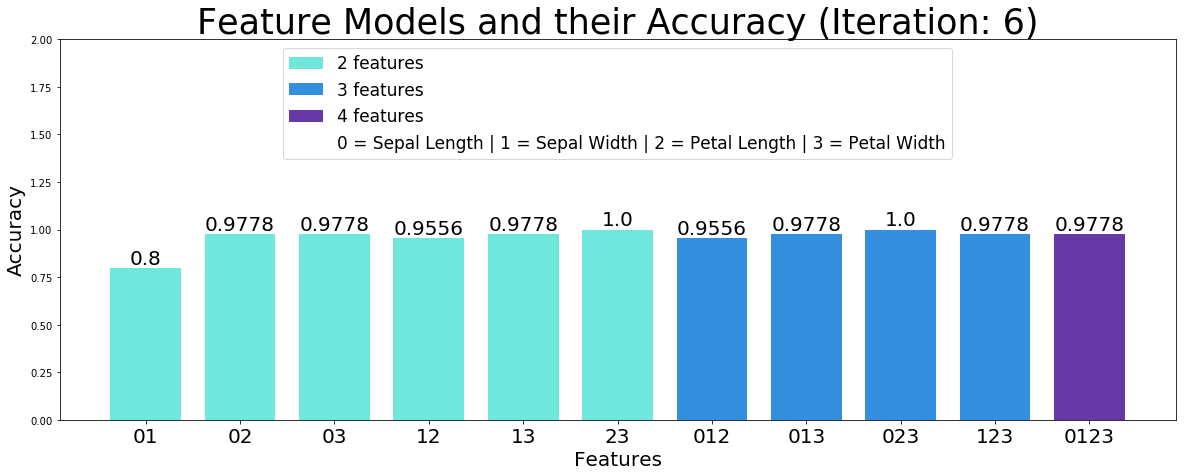

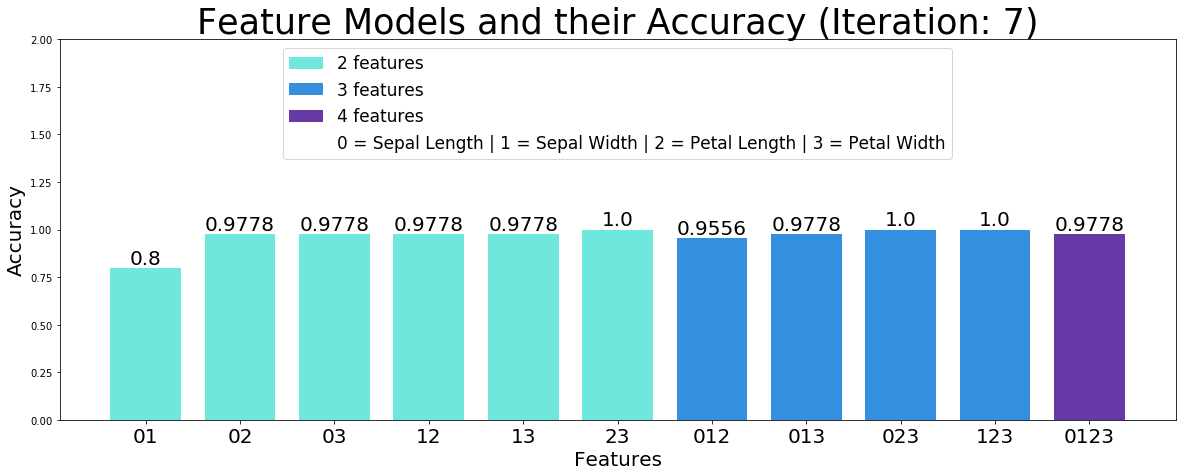

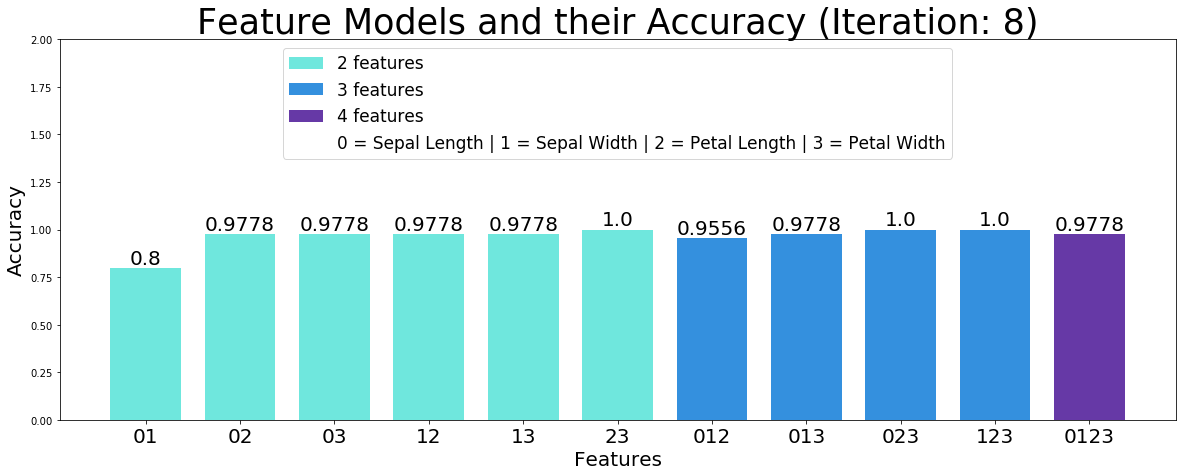

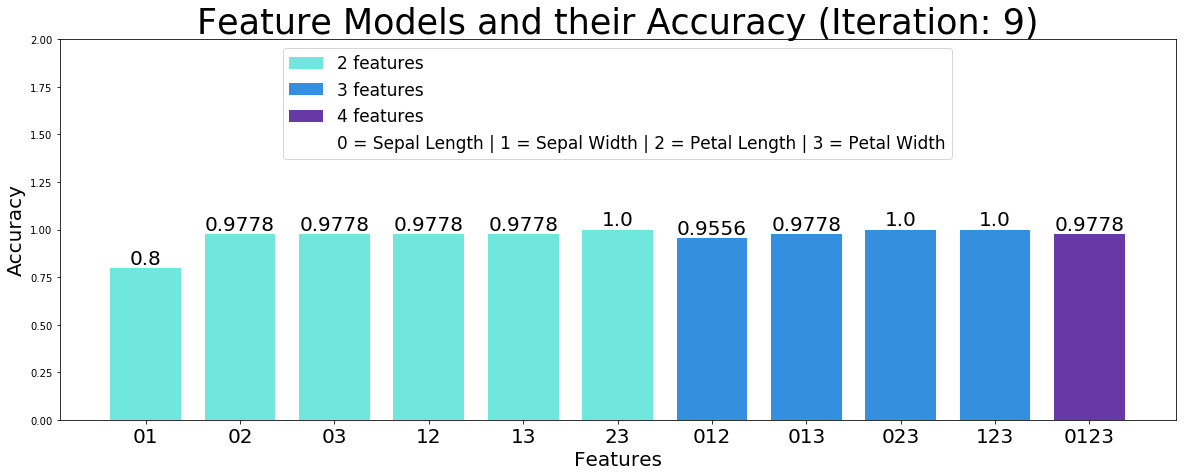

In [167]:
#Now we move to play with the number of iterations. We would like to know at what iteration number most
#of our models have reached the ORIGINAL values from the above chart. 
#We use the parameter "max_iter" to accomplish this and set the wanted iterations.
for iterations in range(0,10):
    accuracy2f = train_and_get_accuracy(pairs_train,pairs_test,Y_train,Y_test, max_iter=iterations)
    accuracy3f = train_and_get_accuracy(triplets_train,triplets_test,Y_train,Y_test,max_iter=iterations)
    accuracy4f = train_and_get_accuracy(quad_train,quad_test,Y_train,Y_test,max_iter=iterations)

    barchart(accuracy2f,accuracy3f,accuracy4f, optext=" (Iteration: " + str(iterations) + ")")

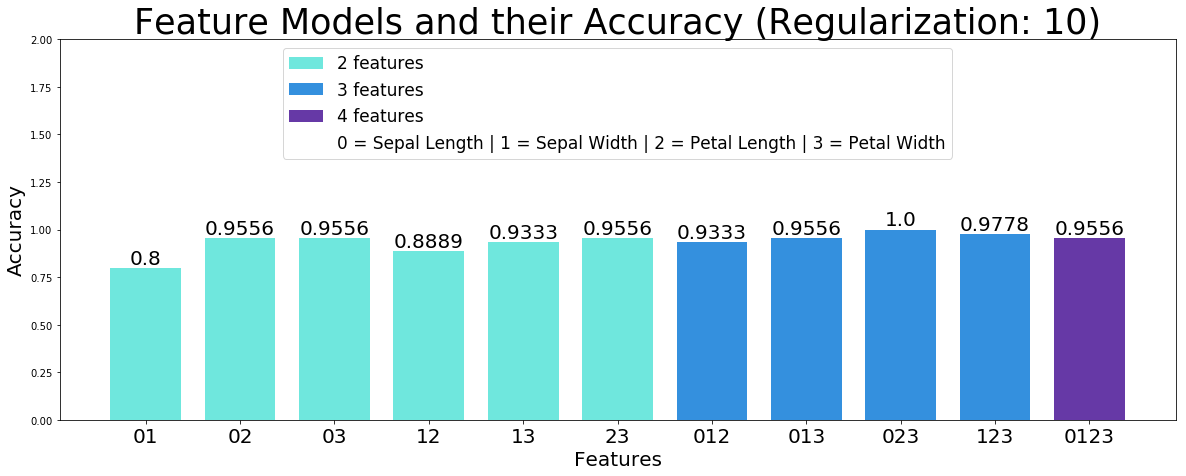

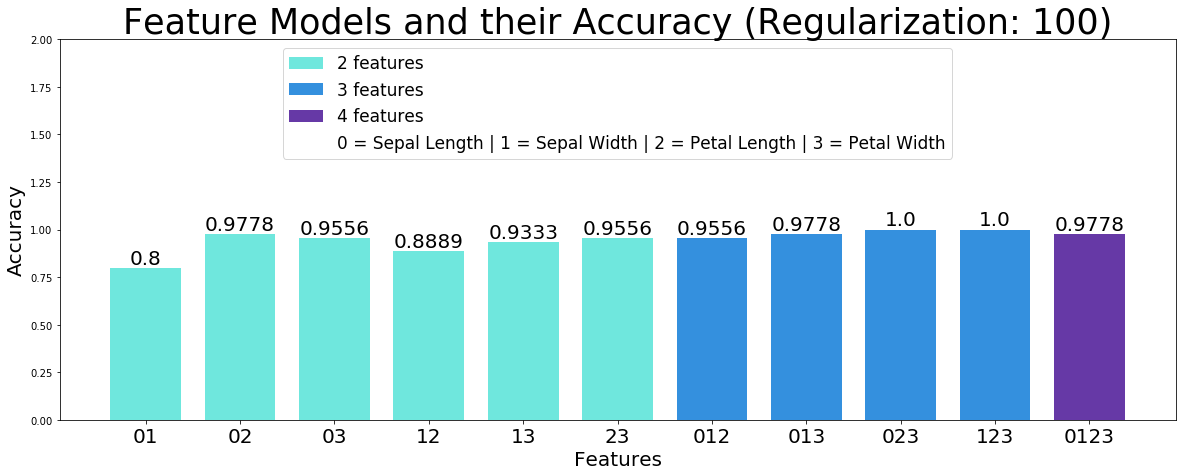

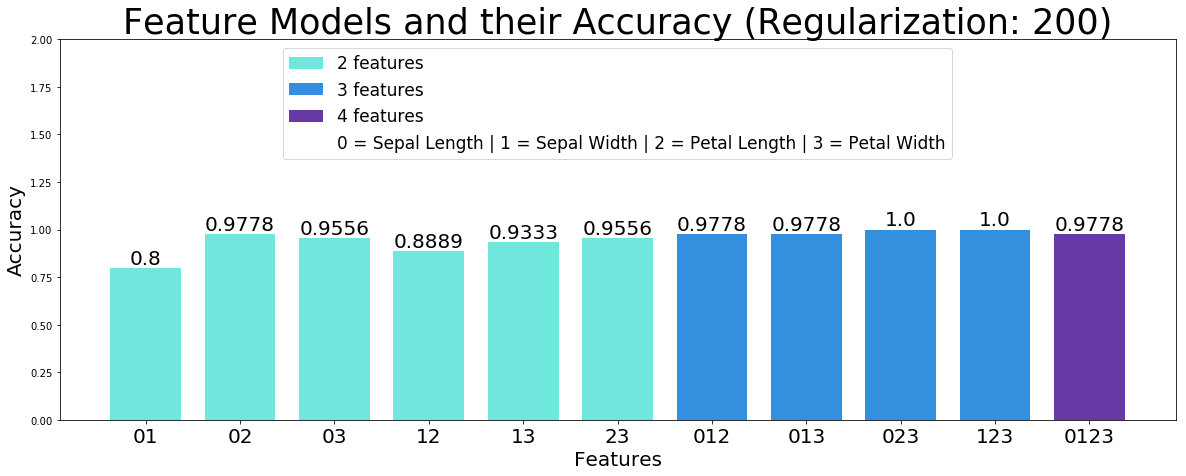

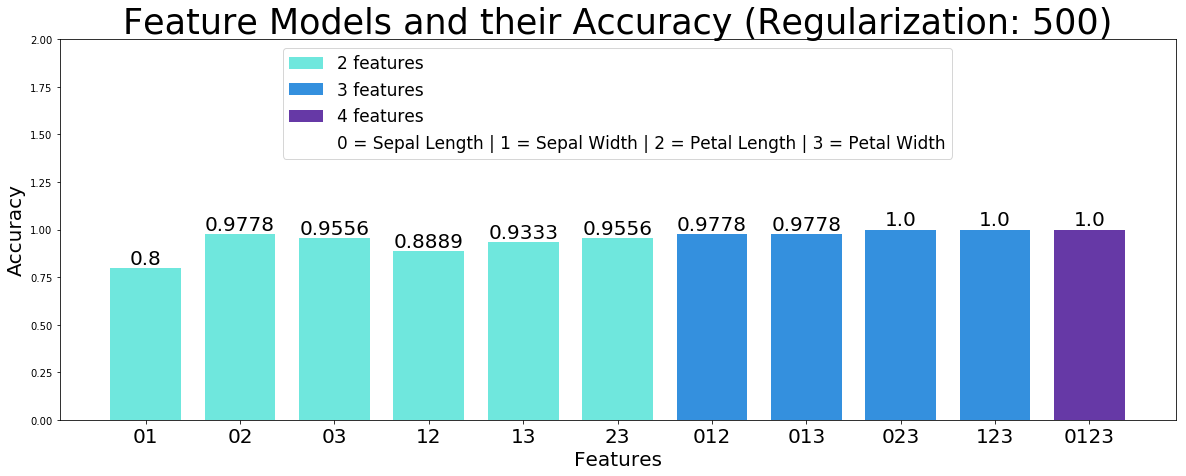

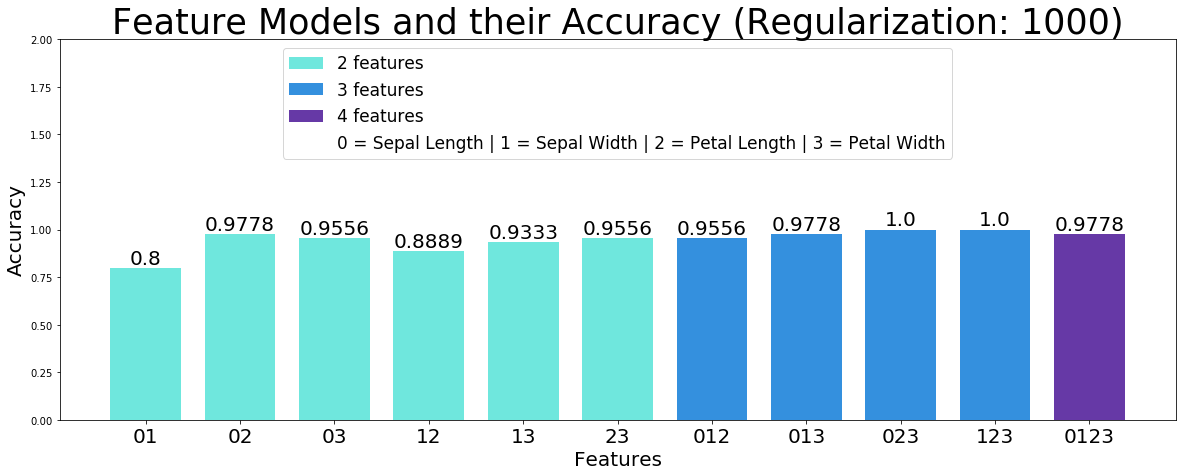

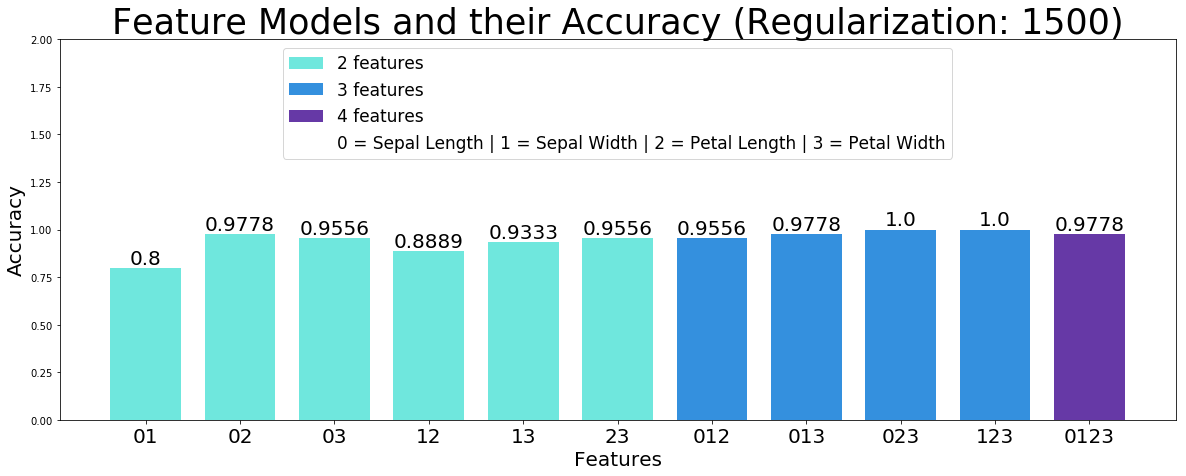

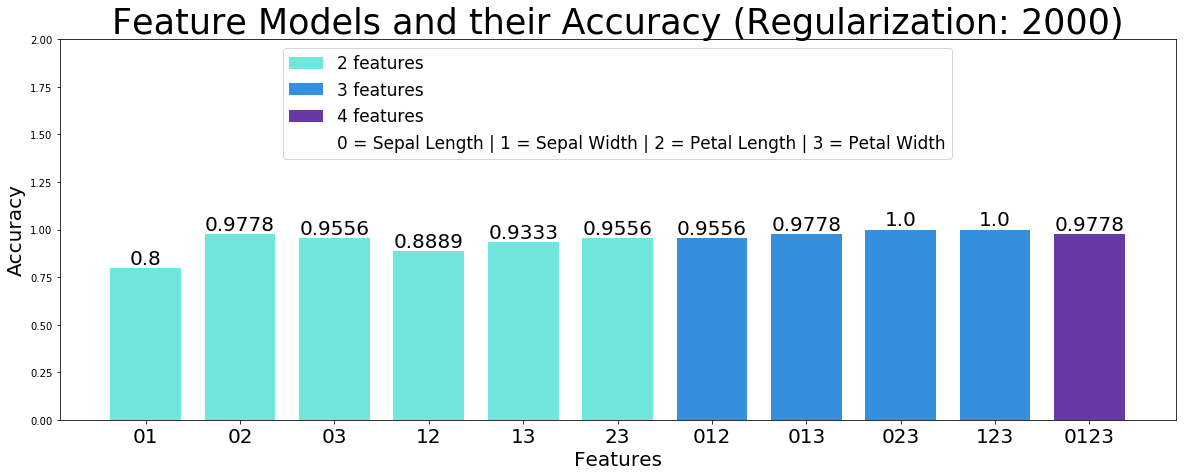

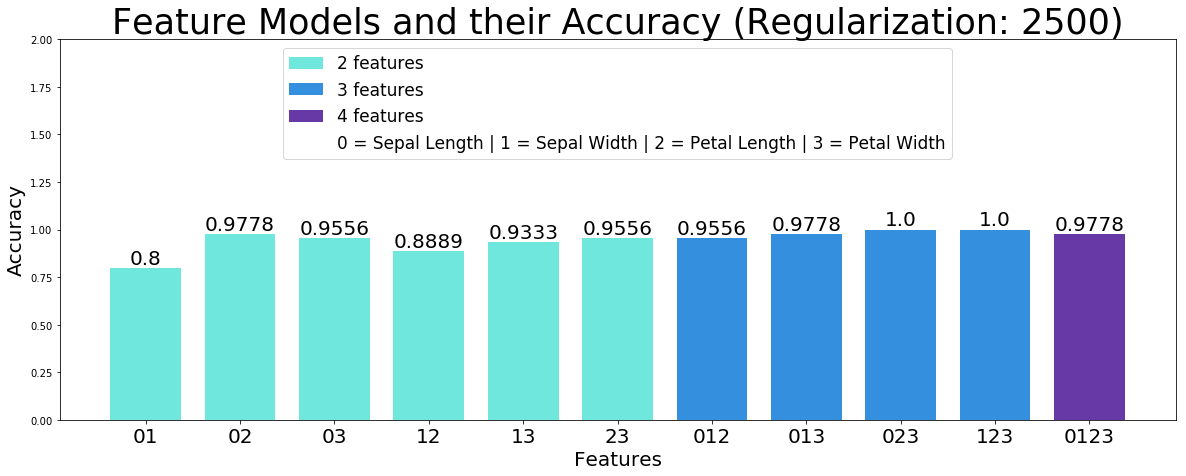

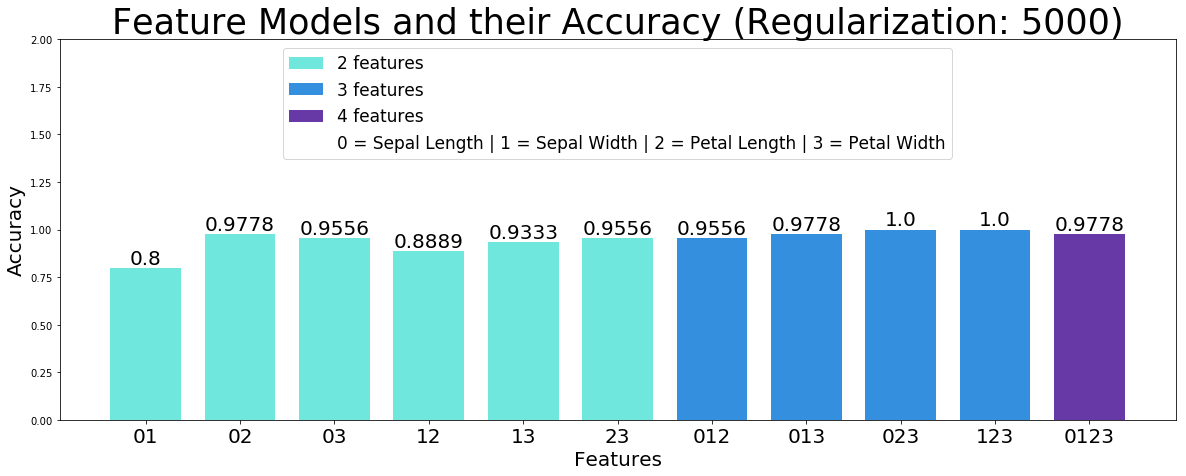

In [169]:
#Now we play with the parameter C whihc is associated with regularization
#Now we move to play with the number of iterations. We would like to know at what iteration number most
#of our models have reached the ORIGINAL values from the above chart. 
#We use the parameter "max_iter" to accomplish this and set the wanted iterations.
for C in [10,100,200,500,1000,1500,2000,2500,5000]:
    accuracy2f = train_and_get_accuracy(pairs_train,pairs_test,Y_train,Y_test,max_iter=3, C=C)
    accuracy3f = train_and_get_accuracy(triplets_train,triplets_test,Y_train,Y_test,C=C)
    accuracy4f = train_and_get_accuracy(quad_train,quad_test,Y_train,Y_test,C=C)

    barchart(accuracy2f,accuracy3f,accuracy4f, optext=" (Regularization: " + str(C) + ")")